<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Trying-Parameters-on-RCS0224-i-filter" data-toc-modified-id="Trying-Parameters-on-RCS0224-i-filter-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Trying Parameters on RCS0224 i filter</a></span></li><li><span><a href="#Trying-Parameters-on-RCS0224-r-filter" data-toc-modified-id="Trying-Parameters-on-RCS0224-r-filter-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Trying Parameters on RCS0224 r filter</a></span></li><li><span><a href="#Parse-Table" data-toc-modified-id="Parse-Table-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Parse Table</a></span></li><li><span><a href="#Machine-Learning" data-toc-modified-id="Machine-Learning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Machine Learning</a></span><ul class="toc-item"><li><span><a href="#K-Means-Cluster" data-toc-modified-id="K-Means-Cluster-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>K-Means Cluster</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import os
from SExtractor import SE

In [2]:
main_dir = "/Volumes/LaCie/School/ASTR_301/A2/out/final/"
os.chdir(main_dir)
out_dir = main_dir+"SE/"

## Trying Parameters on RCS0224 i filter

/Volumes/LaCie/School/ASTR_301/A2/out/final/


Ouch, something seems wrong, check SExtractor log: /Volumes/LaCie/School/ASTR_301/A2/out/final/RCS0224_i.log.txt
Ouch, something seems wrong, check SExtractor log: /Volumes/LaCie/School/ASTR_301/A2/out/final/RCS0224_i.log.txt


SystemError: <built-in method write of _io.FileIO object at 0x11dde53f0> returned a result with an error set

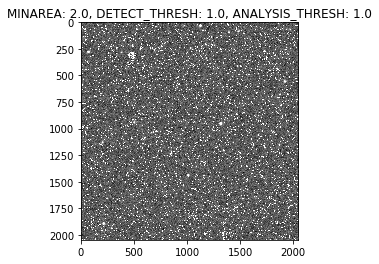

In [6]:
if __name__ == "__main__":
    obj_name = "RCS0224"
    filter = "i"
    test = SE(main_dir, out_dir, obj_name, filter)
    
    for i in np.linspace(2, 12, 6):
        for j in np.linspace(0.5, 3.5, 7):
            table = test.source(MINAREA=i, THRESH=j, ANALYSIS_THRESH=j);
            test.view_obj();

After conduting tests on RCS0224-i, we see that the following parameters produce the best detection:

* MINAREA: 10.0
* THRESH: 1.0
* ANALYSIS THRESH: 1.0

## Trying Parameters on RCS0224 r filter

/Volumes/LaCie/School/ASTR_301/A2/out/final/


Ouch, something seems wrong, check SExtractor log: /Volumes/LaCie/School/ASTR_301/A2/out/final/RCS0224_r.log.txt
Ouch, something seems wrong, check SExtractor log: /Volumes/LaCie/School/ASTR_301/A2/out/final/RCS0224_r.log.txt
Ouch, something seems wrong, check SExtractor log: /Volumes/LaCie/School/ASTR_301/A2/out/final/RCS0224_r.log.txt


KeyboardInterrupt: 

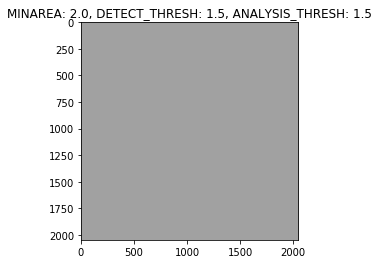

In [3]:
if __name__ == "__main__":
    obj_name = "RCS0224"
    filter = "r"
    test = SE(main_dir, out_dir, obj_name, filter)
    
    for i in np.linspace(2, 12, 6):
        for j in np.linspace(0.5, 3.5, 7):
            table = test.source(MINAREA=i, THRESH=j, ANALYSIS_THRESH=j);
            test.view_obj();

After conduting tests on RCS0224-i, we see that the following parameters produce the best detection:

* MINAREA: 10.0
* THRESH: 1.0
* ANALYSIS THRESH: 1.0

## Parse Table

In [24]:
X = [[table["X_IMAGE"][i], table["Y_IMAGE"][i]] for i in range(len(table))]

## Machine Learning 

### K-Means Cluster

In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters=len(table), random_state=0).fit(X)

In [27]:
labels = kmeans.predict(X)

C = kmeans.cluster_centers_

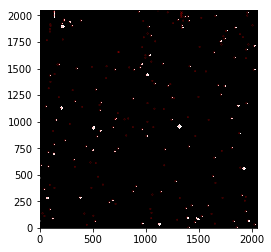

In [28]:
plt.clf()
test.view_obj()
plt.scatter(C[:,0], C[:,1], facecolors='none', 
            edgecolors='r', s=2.0,
           linewidth=0.2)

plt.xlim(0,2048)
plt.ylim(0,2048)

plt.savefig("{}{}_{}_binary.png".format(out_dir,obj_name,filter),
                    bbox_to_inches="tight",
                    dpi=600)
plt.show()

In [38]:
xx, yy = np.meshgrid(np.arange(0, 2048, 1), 
                     np.arange(0, 2048, 1))

In [39]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

In [40]:
Z = Z.reshape(xx.shape)

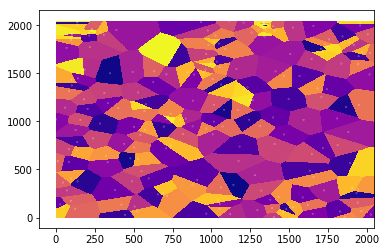

In [45]:
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap="plasma",
           aspect='auto', origin='lower')

plt.scatter(C[:,0], C[:,1], facecolors='none', 
            edgecolors='white', s=2.0,
           linewidth=0.2)

plt.savefig("{}{}_{}_binary.png".format(out_dir,obj_name,filter),
                    bbox_to_inches="tight",
                    dpi=600)
plt.show()